In [181]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# import statsmodels.api as sm
# import scipy.stats as stats
import statsmodels.api as sm
import pylab
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import re
from plot_metric.functions import BinaryClassification
from catboost import CatBoostClassifier
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.utils import class_weight
import pickle

In [92]:
# !pip install plot_metric
# !pip install catboost --no-cache-dir

In [93]:
# Importing the dataset
dataset=pd.read_csv("D:/Data Science Project/Loan Prediction/credit_train.csv")

In [94]:
# Exploratory Data Analysis
dataset.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


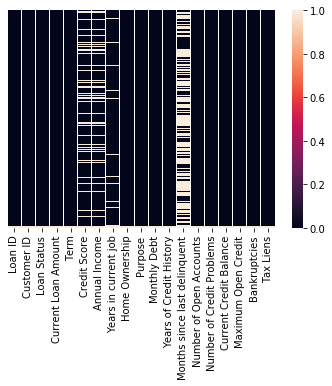

In [95]:
## Checking the missing values
sns.heatmap(dataset.isnull(),yticklabels=False)

In [96]:
dataset.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [98]:
dataset.isnull().mean()*100

Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64

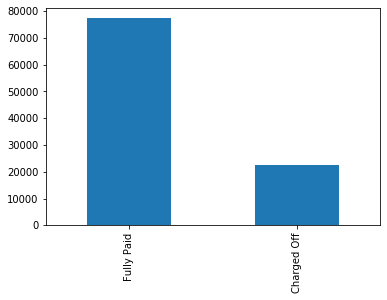

In [99]:
## Visualizing the target column
dataset['Loan Status'].value_counts().plot(kind='bar')
plt.show()

<Figure size 1152x360 with 0 Axes>

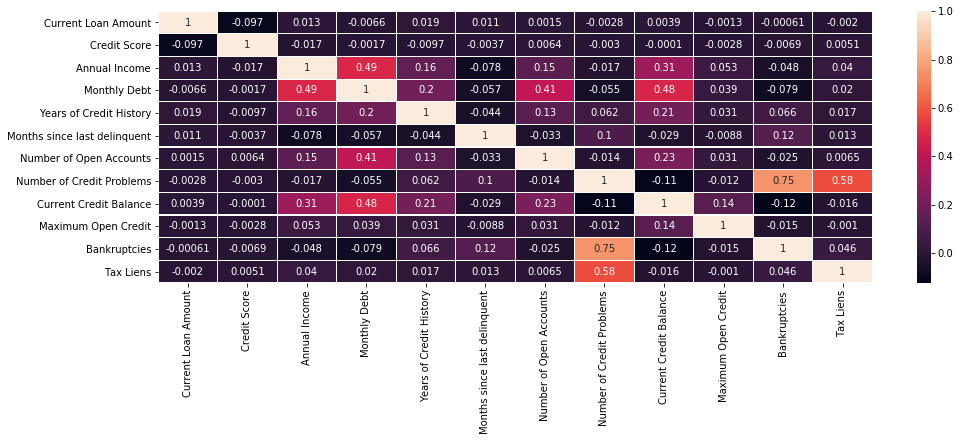

In [100]:
## Correlation Matrix Heatmap
plt.figure(figsize=(16,5))
plt.figure(figsize = (16,5))
sns.heatmap(dataset.corr(),annot=True,linewidths=0.1)


In [101]:
## Dropping the highly correlated and unneccesary columns
dataset.drop(columns=['Loan ID','Customer ID','Bankruptcies'],inplace=True)

In [102]:
## Splitting into train and test
X=dataset.drop(columns=['Loan Status'])
y=dataset['Loan Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [ ]:
train=X_train
train['Loan Status']=y_train

In [104]:
train.isnull().mean()*100

Current Loan Amount              0.515925
Term                             0.515925
Credit Score                    19.599483
Annual Income                   19.599483
Years in current job             4.717236
Home Ownership                   0.515925
Purpose                          0.515925
Monthly Debt                     0.515925
Years of Credit History          0.515925
Months since last delinquent    53.377677
Number of Open Accounts          0.515925
Number of Credit Problems        0.515925
Current Credit Balance           0.515925
Maximum Open Credit              0.517347
Tax Liens                        0.521611
Loan Status                      0.515925
dtype: float64

In [105]:
train.drop(columns=['Months since last delinquent'],inplace=True)

In [106]:
train.head(5)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Loan Status
93088,42900.0,Short Term,740.0,509485.0,10+ years,Rent,Debt Consolidation,8873.57,16.7,11.0,1.0,45733.0,212630.0,0.0,Fully Paid
74764,220616.0,Short Term,NaN,NaN,8 years,Rent,Take a Trip,29574.83,26.2,8.0,1.0,161747.0,210672.0,0.0,Fully Paid
99536,766458.0,Long Term,698.0,1872355.0,10+ years,Home Mortgage,Debt Consolidation,33234.23,17.5,7.0,0.0,307363.0,453376.0,0.0,Fully Paid
91232,494010.0,Long Term,NaN,NaN,6 years,Home Mortgage,Debt Consolidation,12896.63,16.2,11.0,1.0,252757.0,542982.0,0.0,Fully Paid
72952,325578.0,Short Term,721.0,1306193.0,4 years,Rent,Debt Consolidation,23947.22,13.7,10.0,1.0,3610.0,190454.0,0.0,Fully Paid


In [ ]:
## Checking the distribution
sns.distplot(train['Tax Liens'],hist=False,rug=False)
plt.ylabel('Probability Distribution')
plt.title('Normal Distribution')

In [108]:
train.drop(columns='Current Loan Amount',inplace=True)

In [109]:
train.head(5)

,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Loan Status
93088,Short Term,740.0,509485.0,10+ years,Rent,Debt Consolidation,8873.57,16.7,11.0,1.0,45733.0,212630.0,0.0,Fully Paid
74764,Short Term,NaN,NaN,8 years,Rent,Take a Trip,29574.83,26.2,8.0,1.0,161747.0,210672.0,0.0,Fully Paid
99536,Long Term,698.0,1872355.0,10+ years,Home Mortgage,Debt Consolidation,33234.23,17.5,7.0,0.0,307363.0,453376.0,0.0,Fully Paid
91232,Long Term,NaN,NaN,6 years,Home Mortgage,Debt Consolidation,12896.63,16.2,11.0,1.0,252757.0,542982.0,0.0,Fully Paid
72952,Short Term,721.0,1306193.0,4 years,Rent,Debt Consolidation,23947.22,13.7,10.0,1.0,3610.0,190454.0,0.0,Fully Paid


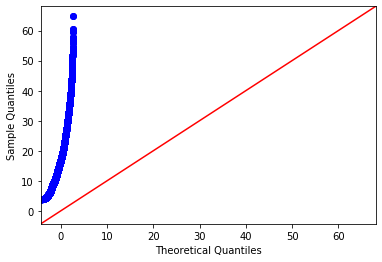

In [110]:
# Q-Q plot
sm.qqplot(train['Years of Credit History'],dist="norm",line='45')
pylab.show()

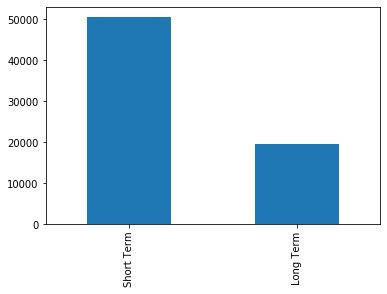

In [111]:
train['Term'].value_counts().plot(kind='bar')
plt.plot()
plt.show()

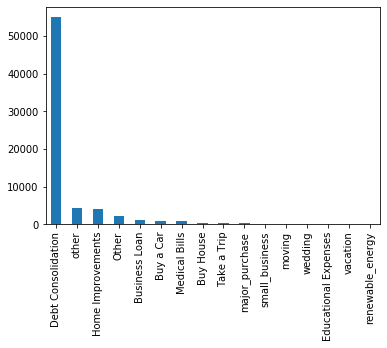

In [112]:
train['Purpose'].value_counts().plot(kind='bar')
plt.plot()
plt.show()

In [ ]:
# Handling Missing values
train["Term"].fillna(train["Term"].mode()[0], inplace = True) 
train = train.dropna(axis=0, subset=['Credit Score'])
train['Years in current job'].fillna(train["Years in current job"].mode()[0],inplace=True)
train = train.dropna(axis=0, subset=['Maximum Open Credit'])
train = train.dropna(axis=0, subset=['Tax Liens'])


In [114]:
train.isnull().mean()*100

Term                         0.0
Credit Score                 0.0
Annual Income                0.0
Years in current job         0.0
Home Ownership               0.0
Purpose                      0.0
Monthly Debt                 0.0
Years of Credit History      0.0
Number of Open Accounts      0.0
Number of Credit Problems    0.0
Current Credit Balance       0.0
Maximum Open Credit          0.0
Tax Liens                    0.0
Loan Status                  0.0
dtype: float64

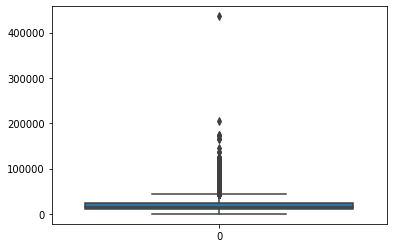

In [115]:
# Univariate Outlier Detection
sns.boxplot(data=train.loc[:,'Monthly Debt'].values)

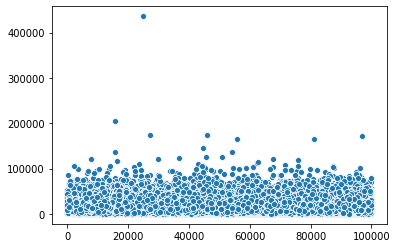

In [116]:
sns.scatterplot(data=train['Monthly Debt'])

In [117]:
## Computing IQR
# Q1 = X_train.quantile(0.25)
# Q3 = X_train.quantile(0.75)
# IQR = Q3 - Q1


In [118]:
# (train < (Q1 - 1.5 * IQR)) | (train> (Q3 + 1.5 * IQR))

In [119]:
# Removing outliers
# train = train[~((train < (Q1 - 1.5 * IQR)) |(train> (Q3 + 1.5 * IQR))).any(axis=1)]

In [120]:
train.shape

(56566, 14)

In [121]:
train.isnull().mean()*100

Term                         0.0
Credit Score                 0.0
Annual Income                0.0
Years in current job         0.0
Home Ownership               0.0
Purpose                      0.0
Monthly Debt                 0.0
Years of Credit History      0.0
Number of Open Accounts      0.0
Number of Credit Problems    0.0
Current Credit Balance       0.0
Maximum Open Credit          0.0
Tax Liens                    0.0
Loan Status                  0.0
dtype: float64

Text(0.5, 1.0, 'Normal Distribution')

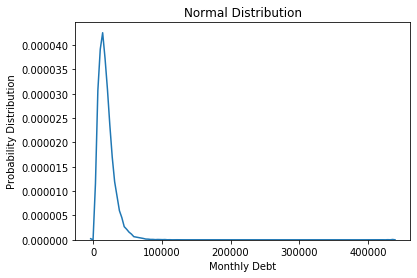

In [122]:
sns.distplot(train['Monthly Debt'],hist=False,rug=False)
plt.ylabel('Probability Distribution')
plt.title('Normal Distribution')

In [123]:
train.head(5)

,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Loan Status
93088,Short Term,740.0,509485.0,10+ years,Rent,Debt Consolidation,8873.57,16.7,11.0,1.0,45733.0,212630.0,0.0,Fully Paid
99536,Long Term,698.0,1872355.0,10+ years,Home Mortgage,Debt Consolidation,33234.23,17.5,7.0,0.0,307363.0,453376.0,0.0,Fully Paid
72952,Short Term,721.0,1306193.0,4 years,Rent,Debt Consolidation,23947.22,13.7,10.0,1.0,3610.0,190454.0,0.0,Fully Paid
43913,Short Term,723.0,951748.0,10+ years,Rent,Debt Consolidation,15307.35,12.8,15.0,1.0,54739.0,507012.0,0.0,Fully Paid
38357,Short Term,745.0,1394657.0,8 years,Home Mortgage,Debt Consolidation,11970.76,18.6,9.0,1.0,85063.0,325028.0,0.0,Fully Paid


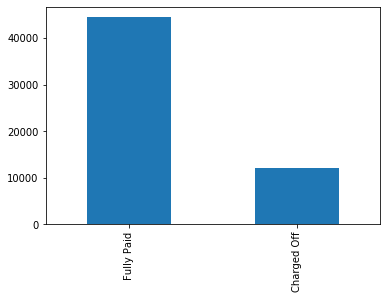

In [124]:
train['Loan Status'].value_counts().plot(kind='bar')
plt.plot()
plt.show()

In [125]:
# ## Feature Encoding
# le=LabelEncoder()
# train['Term']=le.fit_transform(train['Term'])

# # Target Column
# train['Loan Status']=le.fit_transform(train['Loan Status'])


In [126]:
# One Hot Encoding
# train=pd.get_dummies(data=train,columns=['Home Ownership'],prefix_sep='-')
# train=pd.get_dummies(data=train,columns=['Purpose'],prefix_sep='-')
# train=pd.get_dummies(data=train,columns=['Years in current job'],prefix_sep='-')

In [127]:
# train.drop(columns=['_renewable_energy'],inplace=True)

In [128]:
# train.drop(columns=['_< 1 year'],inplace=True)

In [129]:
train.dtypes

Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems    float64
Current Credit Balance       float64
Maximum Open Credit          float64
Tax Liens                    float64
Loan Status                   object
dtype: object

In [130]:
# train['Term']=train['Term'].astype('category')
# train['Loan Status']=train['Loan Status'].astype('category')

In [131]:
train.dtypes

Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems    float64
Current Credit Balance       float64
Maximum Open Credit          float64
Tax Liens                    float64
Loan Status                   object
dtype: object

In [132]:
 # Handling Imbalanced Classes of target column
X_train_new=train.drop(columns=['Loan Status'])
y_train_new=train['Loan Status']

# sm = SMOTE(random_state=42)

# # ros = RandomOverSampler(random_state=0)
# # X_res, y_res = ros.fit_resample(X_train_new, y_train_new)

# # # rus = RandomUnderSampler(random_state=42)
# X_res, y_res = sm.fit_resample(X_train_new, y_train_new)


In [133]:
# y_res=pd.Series(y_res)
# y_res.value_counts().plot(kind='bar')
# plt.plot()
# plt.show()

In [134]:
 ## Handling Missing values in Test Data
X_test.isnull().mean()*100

Current Loan Amount              0.500746
Term                             0.500746
Credit Score                    19.492621
Annual Income                   19.492621
Years in current job             4.699055
Home Ownership                   0.500746
Purpose                          0.500746
Monthly Debt                     0.500746
Years of Credit History          0.500746
Months since last delinquent    53.387498
Number of Open Accounts          0.500746
Number of Credit Problems        0.500746
Current Credit Balance           0.500746
Maximum Open Credit              0.504062
Tax Liens                        0.520643
dtype: float64

In [ ]:
test=X_test
test['Loan Status']=y_test
test=test.dropna(axis=0)

In [136]:
train['Loan Status'].value_counts()

Fully Paid     44481
Charged Off    12085
Name: Loan Status, dtype: int64

In [137]:
test.isnull().mean()*100

Current Loan Amount             0.0
Term                            0.0
Credit Score                    0.0
Annual Income                   0.0
Years in current job            0.0
Home Ownership                  0.0
Purpose                         0.0
Monthly Debt                    0.0
Years of Credit History         0.0
Months since last delinquent    0.0
Number of Open Accounts         0.0
Number of Credit Problems       0.0
Current Credit Balance          0.0
Maximum Open Credit             0.0
Tax Liens                       0.0
Loan Status                     0.0
dtype: float64

In [138]:
# ## Feature Encoding
# le=LabelEncoder()
# test['Term']=le.fit_transform(test['Term'])

# # Target Column
# test['Loan Status']=le.fit_transform(test['Loan Status'])


In [139]:
# One Hot Encoding
# test=pd.get_dummies(data=test,columns=['Home Ownership'],prefix_sep='-')
# test=pd.get_dummies(data=test,columns=['Purpose'],prefix_sep='-',)
# test=pd.get_dummies(data=test,columns=['Years in current job'],prefix_sep='-')

In [140]:
# test.drop(columns=['_renewable_energy'],inplace=True)
# test.drop(columns=['_< 1 year'],inplace=True)


In [141]:
# test['Term']=test['Term'].astype('category')
# test['Loan Status']=test['Loan Status'].astype('category')

In [ ]:
test.drop(columns=['Current Loan Amount'],inplace=True)

In [143]:
test.head(5)

,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Loan Status
83837,Short Term,744.0,1090752.0,2 years,Rent,Debt Consolidation,16997.59,18.8,5.0,9.0,0.0,377036.0,537636.0,0.0,Fully Paid
57656,Long Term,680.0,2211657.0,4 years,Home Mortgage,Debt Consolidation,44601.74,14.5,15.0,11.0,0.0,213921.0,509652.0,0.0,Fully Paid
50783,Short Term,750.0,6500375.0,6 years,Home Mortgage,Home Improvements,32231.03,20.6,81.0,10.0,0.0,53713.0,482130.0,0.0,Fully Paid
38528,Short Term,738.0,1281873.0,3 years,Rent,Debt Consolidation,16984.86,25.0,51.0,15.0,1.0,116109.0,344696.0,0.0,Fully Paid
74032,Short Term,741.0,814834.0,< 1 year,Home Mortgage,Debt Consolidation,22475.86,25.7,75.0,10.0,0.0,170582.0,247192.0,0.0,Charged Off


In [144]:
test.isnull().mean()*100

Term                            0.0
Credit Score                    0.0
Annual Income                   0.0
Years in current job            0.0
Home Ownership                  0.0
Purpose                         0.0
Monthly Debt                    0.0
Years of Credit History         0.0
Months since last delinquent    0.0
Number of Open Accounts         0.0
Number of Credit Problems       0.0
Current Credit Balance          0.0
Maximum Open Credit             0.0
Tax Liens                       0.0
Loan Status                     0.0
dtype: float64

In [145]:
X_test=test.drop(columns=['Loan Status'])
y_test=test['Loan Status']
X_test.drop(columns=['Months since last delinquent'],inplace=True)

In [146]:
# X_res=pd.DataFrame(X_res)
# X_res.info()

In [147]:
# X_res=pd.DataFrame(X_res)

In [148]:
# X_res.info()

In [149]:
# # Computing class weights
# cw = list(class_weight.compute_class_weight('balanced',
#                                              y_train_new,
#                                              y_train_new))

In [150]:
# class_weights={'Fully Paid':0.63,'Charged Off':2.35}

In [151]:
#Checking for any categorical features
cate_features_index = np.where(X_train_new.dtypes != float)[0]

In [ ]:
## Fitting the Classifier to the training data
# classifier=LogisticRegression(max_iter=200)
# classifier=SVC()
# classifier=DecisionTreeClassifier(max_depth=20,max_leaf_nodes=20)
# classifier=RandomForestClassifier(n_estimators=800,max_depth=9)
# classifier=XGBClassifier(silent=False, 
#                       scale_pos_weight=1,
#                       learning_rate=0.01,  
#                       colsample_bytree = 0.4,
#                       subsample = 0.8,
#                       objective='binary:logistic', 
#                       n_estimators=1000, 
#                       reg_alpha = 0.3,
#                       max_depth=4, 
#                       gamma=10)
classifier = CatBoostClassifier(iterations=2000, learning_rate=0.01, l2_leaf_reg=3.5, depth=9, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42,class_weights=[2.35,0.63])

classifier.fit(X_train_new,y_train_new,cat_features=cate_features_index,eval_set=(X_test,y_test))

In [153]:
# X_test['Term'] = pd.to_numeric(X_test['Term'])

In [154]:
# X_test=np.array(X_test)

In [155]:
# regex = re.compile(r"\[|\]|<", re.IGNORECASE)

# X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


In [156]:
# GridSearch Hyperparameter Tuning
# grid_values = {'n_estimators': [100, 200,400,800],'max_depth':[1,2,3,6,4]}
# grid_clf_acc = GridSearchCV(classifier, param_grid = grid_values,scoring = 'accuracy')
# grid_clf_acc.fit(X_res, y_res)

In [157]:
# grid_clf_acc.__best__params_

In [158]:
## Predicting the training set results
y_pred_train=classifier.predict(X_train_new)
# y_pred_train = classifier.predict_proba(X_train_new)[:,1]

In [159]:
## Predicting the Test set results

In [160]:
y_pred_test=classifier.predict(X_test)
# y_pred_test = classifier.predict_proba(X_test)[:,1]

In [161]:
# Checking the training accuracy
print(accuracy_score(y_train_new,y_pred_train))

0.8094968709118552


In [162]:
# Checking the test accuracy
print(accuracy_score(y_test,y_pred_test))

0.781733746130031


In [163]:
# # Training classification report
print(classification_report(y_train_new,y_pred_train))

              precision    recall  f1-score   support

 Charged Off       0.55      0.63      0.58     12085
  Fully Paid       0.89      0.86      0.88     44481

    accuracy                           0.81     56566
   macro avg       0.72      0.74      0.73     56566
weighted avg       0.82      0.81      0.81     56566



In [164]:
# Testing classification report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

 Charged Off       0.47      0.50      0.49      2268
  Fully Paid       0.87      0.86      0.86      8714

    accuracy                           0.78     10982
   macro avg       0.67      0.68      0.67     10982
weighted avg       0.79      0.78      0.78     10982



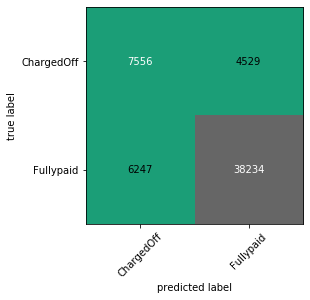

In [165]:
# Training confusion matrix
class_names = ['ChargedOff','Fullypaid']
cm=confusion_matrix(y_target=y_train_new,y_predicted=y_pred_train)
fig,ax=plot_confusion_matrix(conf_mat=cm,cmap='Dark2',class_names=class_names)
plt.show()

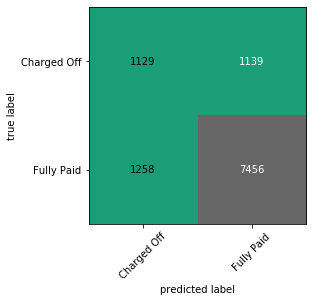

In [166]:
# Testing confusion matrix
class_names = ['Charged Off','Fully Paid']
cm=confusion_matrix(y_target=y_test,y_predicted=y_pred_test)
fig,ax=plot_confusion_matrix(conf_mat=cm,cmap='Dark2',class_names=class_names)
plt.show()

In [167]:
# Checking the roc_auc score for training data
# print(roc_auc_score(y_train,y_pred_train))

In [168]:
## ROC Curve for training data 

In [169]:
# # Visualisation with plot_metric
# bc = BinaryClassification(y_train_new, y_pred_train, labels=["Class 1", "Class 2"])
# # # Figures
# plt.figure(figsize=(5,5))
# bc.plot_roc_curve()
# plt.show()

In [170]:
# ROC CURVE for test data
# Visualisation with plot_metric
# bc = BinaryClassification(y_test, y_pred_test, labels=["Class 1", "Class 2"])

# # Figures
# plt.figure(figsize=(5,5))
# bc.plot_roc_curve()
# plt.show()

In [182]:
# Saving the model
filename = 'catboost.pkl'
pickle.dump(classifier, open(filename, 'wb'))